# Titanic EDA


The dataset used in this analysis comes from kaggle and it contains Titanic Data.the data contains the follwoing columns. PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch	Ticket,Fare,Cabin	and Embarked. for more details about the data used for this analysis click here https://www.kaggle.com/c/titanic/data.

 ## Question(s) for Analysis:
1. what was the survival rate overall? 

2. which gender fared the worst? what was their survival rate? 

3. what was the survival rate for each `pclass`? 

4. did any reverends survive? how many? 

5. what is the survival rate for cabins marked **¯\\_(ツ)_/¯** 

6. what is the survival rate for people whose `age` is empty? 

7. what is the survival rate for each port of embarkation? 

8. what is the survival rate for children (under 12) in each `pclass`? 

9. did the captain of the ship survive? is he on the list?

10. of all the people that died, who had the most expensive ticket? how much did it cost? 
 
11. does having family on the boat help or hurt your chances of survival?

## Step 1: Reading the data



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [2]:
titanic_data = pd.read_csv('/content/sample_data/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Cleaning the data


## 1. Create a bar chart showing how many missing values are in each column

In [3]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

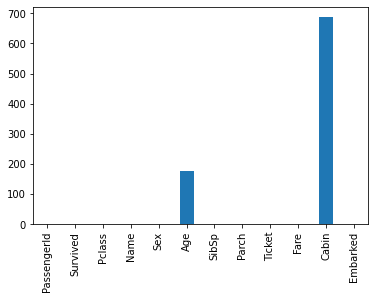

In [4]:
titanic_data.isnull().sum().plot.bar()

## 2. Which column has the most `NaN` values? How many cells in that column are empty?

 Cabin has the most NaN values and the column has 687 empty cells.

In [5]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_data[titanic_data['Cabin'].isnull()].reset_index()['Cabin']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
682    NaN
683    NaN
684    NaN
685    NaN
686    NaN
Name: Cabin, Length: 687, dtype: object

In [7]:
titanic_data['Cabin'].isna().sum().sum()

687

## 3. Delete all rows where `Embarked` is empty

In [8]:

titanic_data['Embarked'].isnull().sum().sum()

2

In [9]:
titanic_data.dropna(subset=['Embarked'], how='all', inplace=True)

In [10]:
titanic_data['Embarked'].isnull().sum().sum()

0

## 4. Fill all empty cabins with **¯\\_(ツ)_/¯**

In [11]:
titanic_data['Cabin'].fillna("¯\\_(ツ)_/¯",inplace=True)

In [12]:
titanic_data['Cabin'].isnull().sum()

0

In [13]:
titanic_data[titanic_data['Cabin']=="¯\\_(ツ)_/¯"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\_(ツ)_/¯,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯\_(ツ)_/¯,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,¯\_(ツ)_/¯,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,¯\_(ツ)_/¯,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\_(ツ)_/¯,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\_(ツ)_/¯,S


## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [14]:
# creating family count from SibSP and Parch
titanic_data['FamilyCount']=titanic_data['SibSp']+titanic_data['Parch']

In [15]:
# create IsReverend column
titanic_data['IsReverend']=0

In [16]:
# Extracting Rev from the names while assigning IsReverend to 1
titanic_data.loc[titanic_data['Name'].str.contains('Rev'),'IsReverend']=1
  

In [17]:
# only six people seems to have Rev title
titanic_data['IsReverend'].value_counts()

0    883
1      6
Name: IsReverend, dtype: int64

In [18]:
dummies=pd.get_dummies(titanic_data['Embarked']).rename(columns = {'C': 'Embarked_C', 'Q': 'Embarked_Q', 'S': 'Embarked_S'})
dummies

titanic_data = pd.concat((titanic_data,dummies), axis =1)

In [19]:
sex_dummy=pd.get_dummies(titanic_data['Sex'])
titanic_data=pd.concat((titanic_data,sex_dummy), axis=1)

# after following step 3  guidelines, now the data looks as below and ready for the next step Exploratory Analysis

In [20]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0,0,0,1,0,1


## Step 4: Exploratory analysis










## 1. What was the survival rate overall?

In [21]:
titanic_data['Survived'].value_counts(normalize=True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

survived rate is 38 % while the death rate is 61%

## 2. Which gender fared the worst? What was their survival rate?

In [22]:
titanic_data.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

the surived rate for male is 74% and 18% for males. if i uderstood the statetment 'fared worst' then males fared worst.

## 3. What was the survival rate for each `Pclass`?

In [23]:
titanic_data['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [24]:
titanic_data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Pclass  1 had the highest survival rate with 62%, followed by class 2 with 47% and pclass 3 with 24%.

## 4. Did any reverends survive? How many?

In [25]:
titanic_data.groupby('IsReverend')['Survived'].mean()

IsReverend
0    0.385051
1    0.000000
Name: Survived, dtype: float64

unfortunately, it seems there there were no reverends who surivived.

## 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [26]:
titanic_data.groupby('Cabin')['Survived'].value_counts(normalize=True)

Cabin      Survived
A10        0           1.000000
A14        0           1.000000
A16        1           1.000000
A19        0           1.000000
A20        1           1.000000
                         ...   
G6         0           0.500000
           1           0.500000
T          0           1.000000
¯\_(ツ)_/¯  0           0.700146
           1           0.299854
Name: Survived, Length: 164, dtype: float64

29 % of Cabins who marked as **¯\\_(ツ)_/¯** Survived

## 6. What is the survival rate for people whose `Age` is empty?

In [27]:
titanic_data['Age'].fillna(0, inplace=True)

filling 0 Where age is Empty. Doing that will easify to calculate Survival Rate 

In [28]:
titanic_data.query("Age==0")['Survived'].value_counts(normalize=True)

0    0.706215
1    0.293785
Name: Survived, dtype: float64

the people with no age record had a chance of 29% survival rate.

## 7. What is the survival rate for each port of embarkation?

In [29]:
titanic_data.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

S  has the lowest survival rate with 33%. Q has 38% of surviving and C has the highest rate of survival wih 55%

## 8. What is the survival rate for children (under 12) in each `Pclass`?

In [30]:
titanic_data.query("Age<12").groupby('Pclass')['Survived'].value_counts(normalize=True)

Pclass  Survived
1       0           0.500000
        1           0.500000
2       1           0.750000
        0           0.250000
3       0           0.710383
        1           0.289617
Name: Survived, dtype: float64

children who borad class 2 survived all while those in class 1 and 3 had surive rate of 75% and 40% respectively

## 9. Did the captain of the ship survive? Is he on the list?

In [31]:
titanic_data[titanic_data['Name'].str.contains('Capt')][['Name','Survived','Pclass']]

,Name,Survived,Pclass
745,"Crosby, Capt. Edward Gifford",0,1


 unfortunately apt. Edward Gifford who is the Captain had not survived and was among the Pclass One who died

## 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [32]:


titanic_data.query("Survived==0").groupby('Survived')[['Name','Ticket','Fare','Pclass']].max()

,Name,Ticket,Fare,Pclass
Survived,,,,
0,"van Melkebeke, Mr. Philemon",WE/P 5735,263.0,3


Mr.Philemon was  the highest paid ticket holder who died with Pclass 3 people with a ticket worth 263.

## 11. Does having family on the boat help or hurt your chances of survival?

In [33]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0,0,0,1,0,1


In [34]:
titanic_data.groupby('Survived')['FamilyCount'].mean()

Survived
0    0.883424
1    0.944118
Name: FamilyCount, dtype: float64

those who had died had 88% of SibSp and  Parch who were on board. while those who survived had 94% of SibSb and Parch. therefore the more a person on board had a familiy member the higher the survival rate.

## Step 5: Plotting
1. Using matplotlib and/or seaborn, create some charts from this data.


male      0.649044
female    0.350956
Name: Sex, dtype: float64

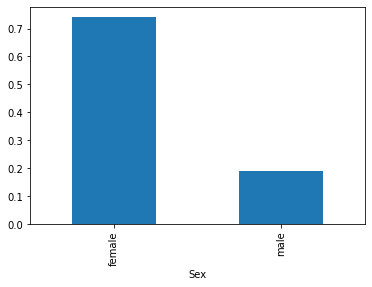

In [35]:
titanic_data.groupby('Sex').Survived.mean().plot(kind= 'bar');
titanic_data.Sex.value_counts(normalize=True)

Observation: 67% of the people who lost their lives were men while the remaining were women

In [36]:
titanic_data.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           134
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

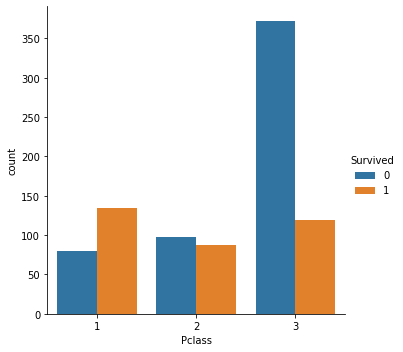

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Countplot
sns.catplot(x ="Pclass", hue ="Survived",kind ="count", data = titanic_data)

Observation: the people who hold ticket class 3 level had the most deaths 0f 372